### Polynomial Regression
* Polynomial Regression is **derived using the same concept of Linear regression** with **few modifications** to **increase accuracy**.
### Table Of Contents
* Why Polynomial Regression?
* How It overcomes the problem of non-linear data?
* Why It is known as Linear Regression?
* Comparing Polynomial and simple Regression Practically
>With One Input Variable
>with Multiple Input variables<br>
*End Notes

### Why Polynomial Regression?
Simple linear regression algorithm only works when the relationship between the data is linear But suppose if we have non-linear data then Linear regression will not capable to draw a best-fit line and It fails in such conditions.
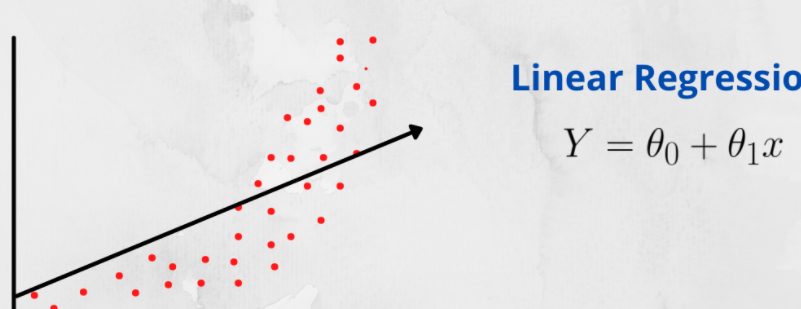

### How Polynomial Regression Overcomes the problem of Non-Linear data?
Polynomial regression is a form of Linear regression where only **due to the Non-linear relationship between dependent and independent variables we add some polynomial terms to linear regression** to convert it into Polynomial regression.

X = Independent data
Y = dependent data.

**Before feeding data** to a mode in preprocessing stage we **convert the input variables into polynomial terms using some degree**.

**Example** my input value is 35 and the degree of a polynomial is 2 so I will find 35 power 0, 35 power 1, and 35 power 2 And this helps to interpret the non-linear relationship in data. Here we are increasing number of features whose base is their exponential power
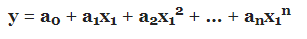

Degree of order which to use is a **Hyperparameter**, and we need to choose it wisely. 
* **High degree of polynomial** tries to **overfit** the data.
* **Smaller values of degree**, the model tries to **underfit**
so we need to find the optimum value of a degree.


### Why Polynomial Regression is called Polynomial Linear Regression?
* In the equation of polynomial regression you can see that we are trying to estimate the relationship between coefficients and y. 
* And the values of x and y are already given to us, only we need to determine coefficients and the degree of coefficient.
* The degree of coefficient here is 1 only, and degree one represents simple linear regression
* Hence, Polynomial regression is also known as polynomial Linear regression. 

### Comparing Polynomial and simple Linear Regression Practically
* Generate the data using some **equation ax^2 + bx + c** 
* Then apply simple linear regression to it and then apply polynomial regression on top the this which will make an easy comparison between the performance of both the algorithms.


 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

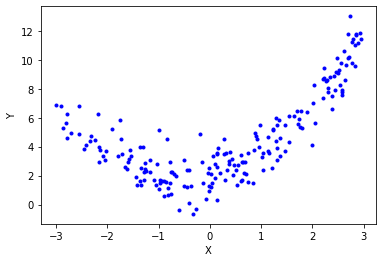

In [2]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#equation used -> y = 0.8x^2 + 0.9x + 2
#visualize the data
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [4]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(r2_score(y_test, y_pred))

0.47129652910625364


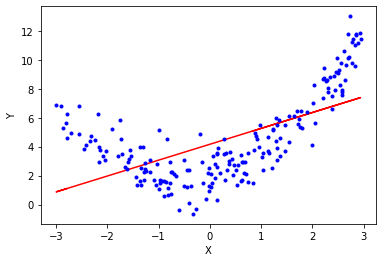

In [5]:
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [6]:
#applying polynomial regression degree 2
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

0.8378335155500765


In [7]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.82454398 0.80495796]]
[2.06345082]


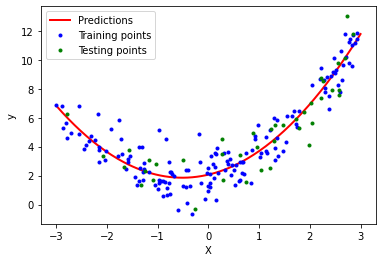

In [8]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()